In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
import os

In [13]:
data_exmpl = pd.read_csv('../data/uber-raw-data-sep14.csv')


In [14]:
data_exmpl

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


Data from april to september of 2014 have all the same fields in csv, so we can merge them and analyse them together

In [15]:
df_apr_2014 = pd.read_csv('../data/uber-raw-data-apr14.csv')
df_may_2014 = pd.read_csv('../data/uber-raw-data-may14.csv')
df_jun_2014 = pd.read_csv('../data/uber-raw-data-jun14.csv')
df_jul_2014 = pd.read_csv('../data/uber-raw-data-jul14.csv')
df_aug_2014 = pd.read_csv('../data/uber-raw-data-aug14.csv')
df_sep_2014 = pd.read_csv('../data/uber-raw-data-sep14.csv')

In [16]:
data_list = [df_apr_2014,df_may_2014,df_jun_2014,df_jul_2014,df_aug_2014,df_sep_2014]

In [17]:
data_list

[                 Date/Time      Lat      Lon    Base
 0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
 1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
 2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
 3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
 4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
 ...                    ...      ...      ...     ...
 564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
 564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
 564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
 564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
 564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764
 
 [564516 rows x 4 columns],
                  Date/Time      Lat      Lon    Base
 0         5/1/2014 0:02:00  40.7521 -73.9914  B02512
 1         5/1/2014 0:06:00  40.6965 -73.9715  B02512
 2         5/1/2014 0:15:00  40.7464 -73.9838  B02512
 3         5/1/2014 0:17:00  40.7463 -74.0011  B02512
 4         5/1/2014 0:17:00  40.7594 -73.9734  B0251

We can take a look into number of pickups for each month

In [19]:
for month_data in data_list:
    month_data['Date/ Time'] = pd.to_datetime(month_data['Date/Time'], format='%m/%d/%Y %H:%M:%S')
    month_data['Hour'] = month_data['Date/ Time'].dt.hour
    month_data['Month'] = month_data['Date/ Time'].dt.month

In [21]:
df_apr_sep_2014 = pd.concat(data_list,ignore_index=True)

In [22]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,4
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,4
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,4
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,4
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,4
...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,9
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,9
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,9
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,9


In [23]:
pd.value_counts(df_apr_sep_2014['Month'])

C:\Users\MARKO\AppData\Local\Temp\ipykernel_27716\3820970743.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_apr_sep_2014['Month'])


Month
9    1028136
8     829275
7     796121
6     663844
5     652435
4     564516
Name: count, dtype: int64

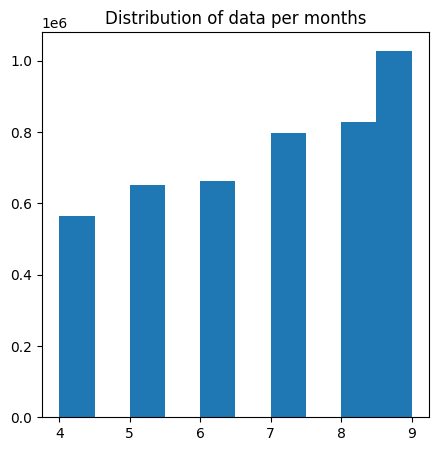

In [24]:
plt.figure(figsize=(5,5))
# sns.histplot(df_aug_sep_2014['Month'])
plt.hist(df_apr_sep_2014['Month'])
plt.title('Distribution of data per months')
plt.show()

We can notice that we have most data for September pickups, and least for April

### Distribution of pickups between different hours in a day 

In [28]:
type(df_apr_sep_2014['Date/ Time'].dtype)

numpy.dtypes.DateTime64DType

In [29]:
df_apr_sep_2014['Date/ Time'].dt.hour

0           0
1           0
2           0
3           0
4           0
           ..
4534322    22
4534323    22
4534324    22
4534325    22
4534326    22
Name: Date/ Time, Length: 4534327, dtype: int32

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


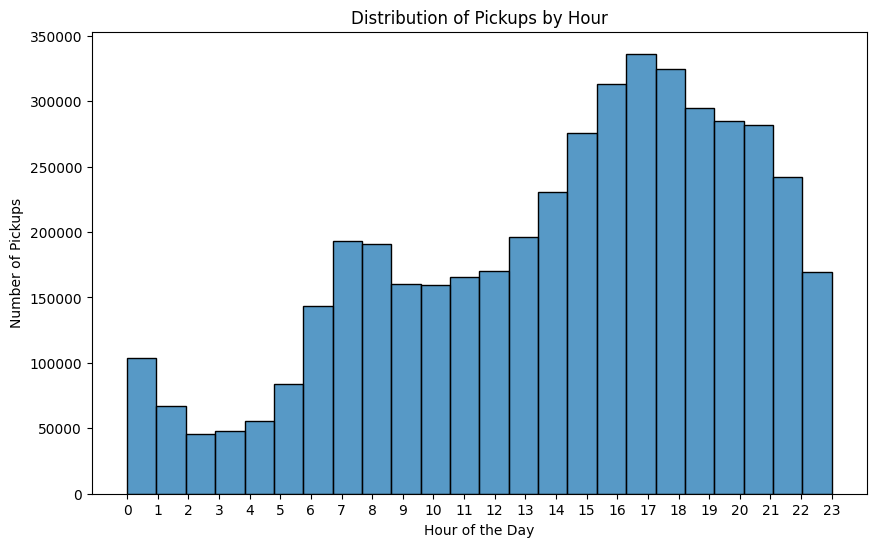

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df_apr_sep_2014['Hour'], bins=24, kde=False)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

We can notice that the most amount of pickups are in the afternoon, and that biggest part of that are between 16 and 19 hours. The least amount of pickups are in the early morning from 0 till 6 o'clock.

We can also see the distribution of pickups between hours considering belonging months 

In [31]:
from matplotlib.lines import Line2D

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

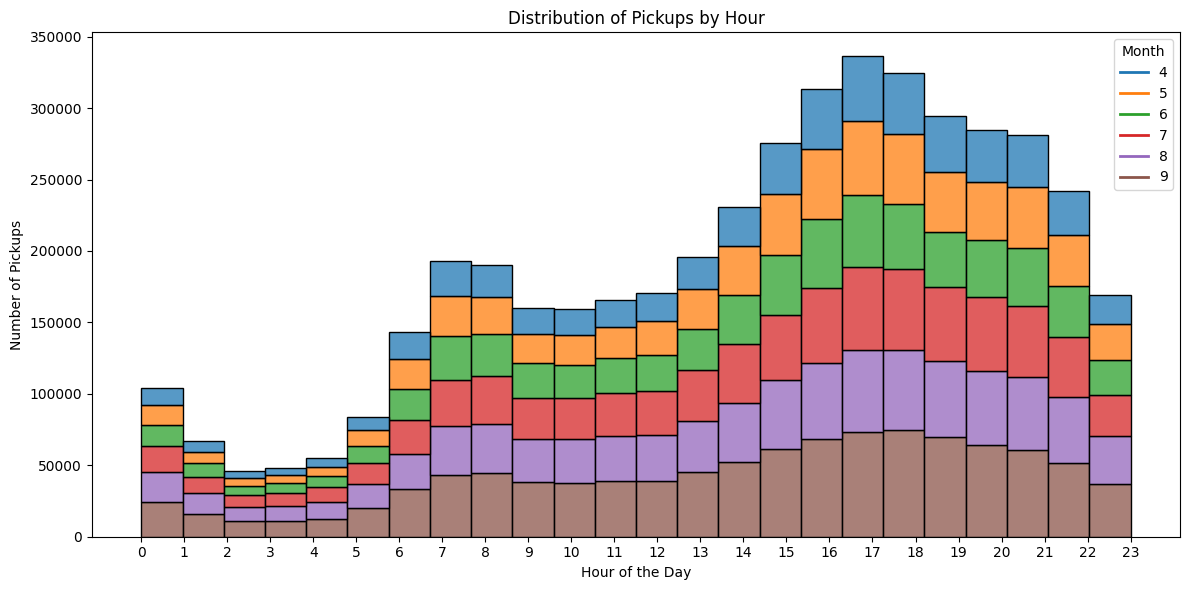

In [32]:
unique_months = df_apr_sep_2014['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [month for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=df_apr_sep_2014,x='Hour',hue='Month',multiple='stack', bins=24, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

As we already noticed that for September we have largest amount of data same we can see in this plot representing distribution of pickups by daily hours, with colors representing to which month pickups belong to

We can take a look into distribution of data per hours for months separately

In [35]:
df_jul_2014['Hour']

0          0
1          0
2          0
3          0
4          0
          ..
796116    23
796117    23
796118    23
796119    23
796120    23
Name: Hour, Length: 796121, dtype: int32

In [36]:
df_apr_2014['Hour']

0          0
1          0
2          0
3          0
4          0
          ..
564511    23
564512    23
564513    23
564514    23
564515    23
Name: Hour, Length: 564516, dtype: int32

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

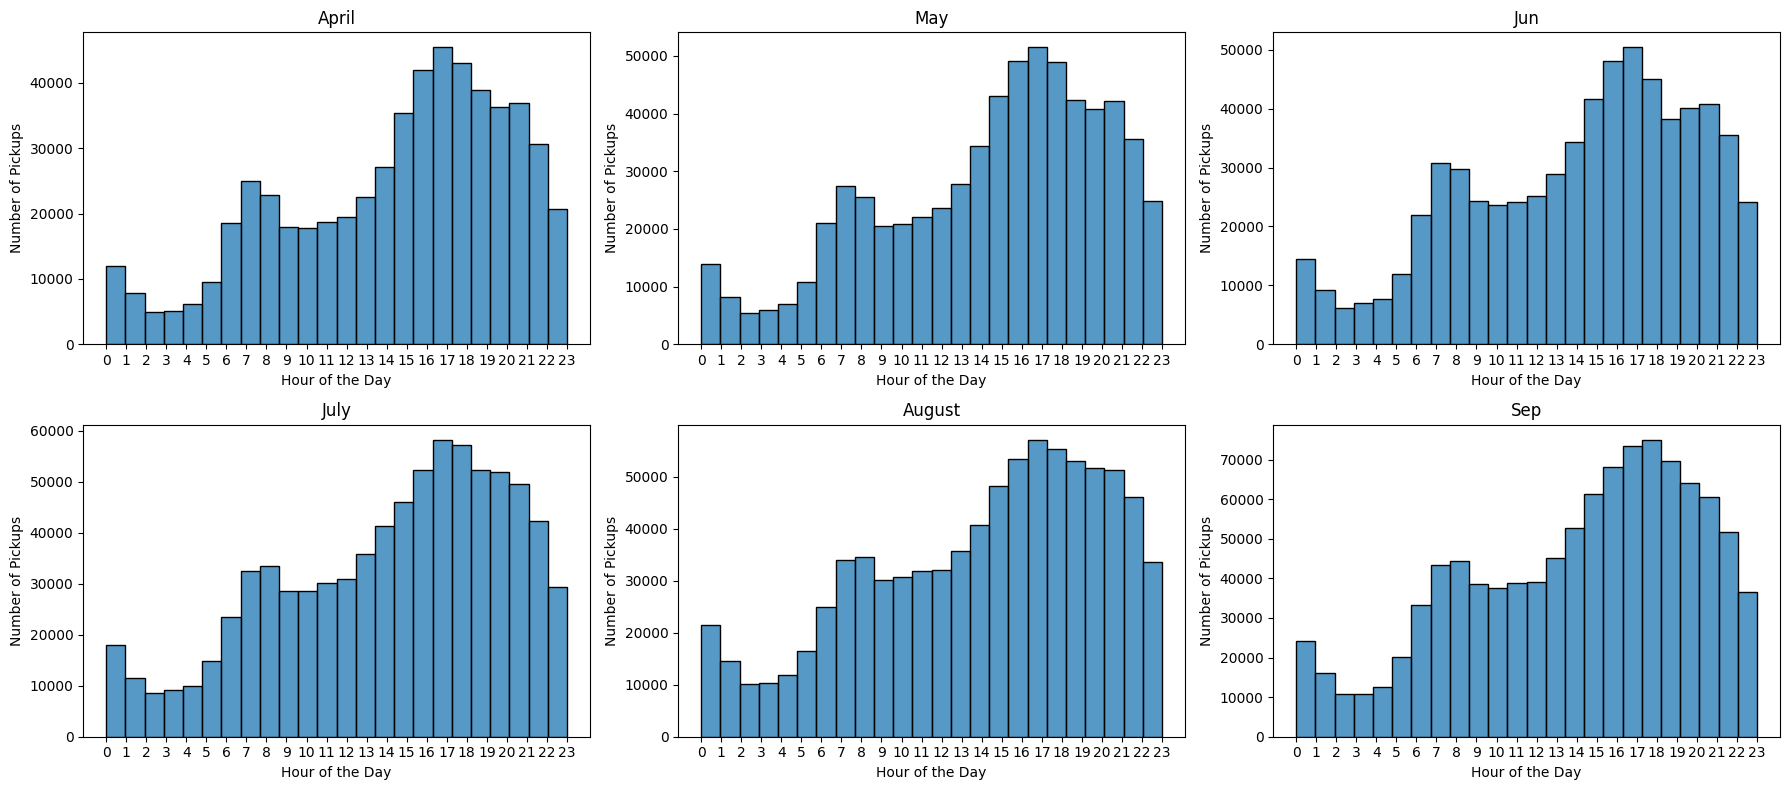

In [37]:
map = {
    1: "April",
    2: "May",
    3: "Jun",
    4: "July",
    5: "August",
    6: "Sep",
}

plt.figure(figsize=(18,8))

for i,month_data in enumerate(data_list):
    plt.subplot(2,3,i+1)
    sns.histplot(month_data['Hour'], bins=24, kde=False)
    plt.title(f'{map[i+1]}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Pickups')
    plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

We can see that distribution of pickups per hours are simmilar for all representing months